In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import copy

In [1]:


def plot(img):
    plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
    plt.show()

def filter_image(image, mask):
        r = image[:,:,0] * mask
        g = image[:,:,1] * mask
        b = image[:,:,2] * mask
        return np.dstack([r,g,b])

In [9]:
def edgesx(img,blur):
    h=1
    new_img=np.zeros((len(img),len(img[1])),dtype=np.uint8)
    for i in range(0,len(img)):
        derivative=[]
        #print('raw ',i)
        for j in range(len(blur[1])-1):
            der=(blur[i][j+h]-blur[i][j])/h
            if der>200:
                derivative.append(der-255)
            else:
                derivative.append(der)
        for d in range(len(derivative)-1):
            a=derivative[d]
            b=derivative[d+1]
            if a==1 and b==0:
                derivative[d]=0
        for d in range(len(derivative)):
            if derivative[d]!=0:
                new_img[i][d]=255
    return new_img
        
def edgesy(img,blur):
    h=1
    y_img=np.zeros((len(img),len(img[1])),dtype=np.uint8)
    for col in range(len(img[1])):
        derivative=[]
        for row in range(len(img)-1):
            der=(blur[row+h][col]-blur[row][col])/h
            if der>200:
                derivative.append(der-255)
            else:
                derivative.append(der)
        for d in range(len(derivative)-1):
            a=derivative[d]
            b=derivative[d+1]
            if a==1 and b==0:
                derivative[d]=0
        for d in range(len(derivative)):
            if derivative[d]!=0:
                y_img[d][col]=255
    return y_img

In [49]:
def moles2(img):
    font = cv.FONT_HERSHEY_SIMPLEX
    kernel=cv.getStructuringElement(cv.MORPH_ELLIPSE,(10,10))
    gray1=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    blur=cv.GaussianBlur(gray1,(31,31),0)
    final_img=edgesy(img,blur)+edgesx(img,blur)
    opening = cv.morphologyEx(final_img, cv.MORPH_CLOSE, kernel)
    opening = cv.morphologyEx(opening, cv.MORPH_OPEN, kernel)
    contours,_=cv.findContours(opening,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)

    moles=[]
    pix=len(img)*len(img[1])
    mole1=0
    plot(opening)
    plot(img)
    for i in contours:
        M=cv.moments(i)

        if M['m00']!=0:
            a=cv.contourArea(i)
            cx=int(M['m10']/M['m00'])
            cy=int(M['m01']/M['m00'])
            x,y,w,h = cv.boundingRect(i)

            if a/(pix) < 0.005 and a/(pix)>1e-05 and x+w<img.shape[1]-2 and x>0:#prepei na do ta megethi analoga ta pixels sto xeri ta exo mikrini arketa
                #cordinate=(x,y,x+w,y+h)
                X=(x,x+w,w)
                Y=(y,y+h,h)
                step_y=int(round(0.1*Y[2],0))
                step_x=int(round(0.1*X[2],0))
                if Y[0]==0 or X[0]==0:
                    croped2=img[(Y[0]):(Y[1]+step_y),(X[0]):(X[1]+step_x)]
                elif step_x>X[0] and step_y<Y[0]:
                    croped2=img[(Y[0]-step_y):(Y[1]+step_y),(X[0]-(step_x-5)):(X[1]+step_x)]
                elif Y[0]-step_y<0 or X[0]-step_x<0:
                    croped2=img[(Y[0]-1):(Y[1]+step_y),(X[0]-1):(X[1]+step_x)]
                else:
                    croped2=img[(Y[0]-step_y):(Y[1]+step_y),(X[0]-step_x):(X[1]+step_x)]
                croped2=cv.cvtColor(croped2,cv.COLOR_BGR2GRAY)
                croped2= cv.GaussianBlur(croped2,(5,5),0)#to eixa 3,3
                gaus=np.mean(croped2,axis=1)
                pivot1=round(min(gaus)+(max(gaus)-min(gaus))*0.1,0)
                count=0
                pivot2=np.where(gaus==min(gaus))[0][0]
                for j in range(pivot2+1,len(gaus)):
                    if gaus[j]>pivot1:
                        count+=1
                t2botm=abs(gaus[0]-gaus[-1])/(max(gaus)-min(gaus))
                if t2botm<0.399:
                    if max(gaus)-min(gaus)>16.1 and count/len(gaus)>0.25 and count/len(gaus)<0.551 and count>7:

                        moles.append(i)
                    elif max(gaus)-min(gaus)>11 and count/len(gaus)>0.299 and count/len(gaus)<0.599 and count>10 and len(gaus)<63 and t2botm<0.15:

                        moles.append(i)
                    elif max(gaus)-min(gaus)>11 and count/len(gaus)>0.399 and count/len(gaus)<0.5299 and count>10 and len(gaus)<55 and t2botm<0.299:
    
                        moles.append(i)
                    elif max(gaus)-min(gaus)>25 and max(gaus)-min(gaus)<100 and count/len(gaus)>0.16 and count/len(gaus)<0.5  and count>4 and count<80:

                        moles.append(i)
                    elif (max(gaus)-min(gaus))>21 and count/len(gaus)>0.32 and count/len(gaus)<0.70  and count>10 and count<80 and len(gaus)<70:

                        moles.append(i)
                mole1+=1
    mole =0
    for mm in moles:
        x,y = mm[0],mm[0]
        mole+=1
        cv.drawContours(img,mm,-1,(79,79,255),3)
        cv.putText(img,str(mole),(list(x[0])[0],list(y[0])[1]-20), font, 2,(0,0,255),3,cv.LINE_AA)
    plot(img)

        

C:\Users\GeorgeXhixho\AppData\Local\Temp\ipykernel_20332\440348934.py:29: RuntimeWarning: overflow encountered in ubyte_scalars
  der=(blur[row+h][col]-blur[row][col])/h
C:\Users\GeorgeXhixho\AppData\Local\Temp\ipykernel_20332\440348934.py:8: RuntimeWarning: overflow encountered in ubyte_scalars
  der=(blur[i][j+h]-blur[i][j])/h


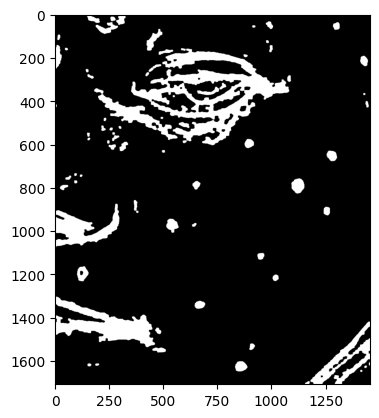

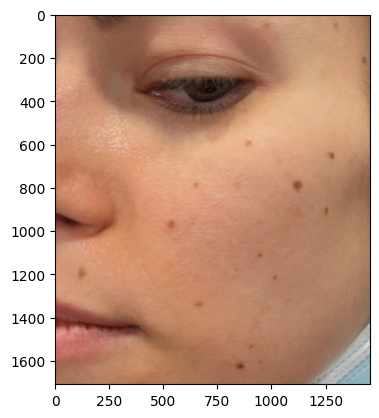

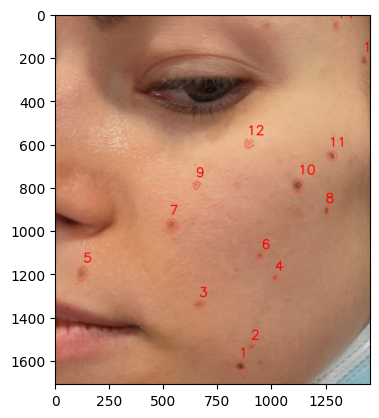

In [50]:
img=cv.imread('C:\\Users\\GeorgeXhixho\\OneDrive - BIOPIX DNA TECHNOLOGY P.C\\skin cancer project\\data skin cancer\\skin_test18.jpg')
img2=np.copy(img)
moles2(img)
